# 代码实现

我们动手编写一维卷积函数。

In [1]:
import matplotlib.pyplot as plt


# 一维卷积
class conv_1d():
    def __init__(self, a, b):
        # 输入信号
        self.a = a
        # 卷积核
        self.b = b
        # 输入信号的坐标，默认从0开始。
        self.ax = [i for i in range(len(a))]
        # 卷积核的坐标，默认从0开始。
        self.bx = [i for i in range(len(b))]

    def conv(self):
        lst1 = self.a
        lst2 = self.b
        l1 = len(lst1)
        l2 = len(lst2)
        lst1 = [0] * (l2 - 1) + lst1 + [0] * (l2 - 1)
        lst2.reverse()
        c = [0 for x in range(0, l1 + l2 - 1)]
        for i in range(l1 + l2 - 1):
            for j in range(l2):
                c[i] += lst1[i + j] * lst2[j]
        return c

    def plot(self):
        a = self.a
        b = self.b
        ax = self.ax
        bx = self.bx

        # 为了更直观的查看结果，我们分别绘制a、b与它们卷积得到的信号
        plt.figure(1)
        # 图一包含1行2列子图，当前画在第一行第一列图上
        plt.subplot(1, 2, 1)
        plt.title('Input')
        plt.bar(ax, a, color='lightcoral', width=0.2)
        plt.plot(ax, a, color='lightcoral')

        plt.figure(1)
        # 当前画在第一行第2列图上
        plt.subplot(1, 2, 2) 
        plt.title('Kernel')
        plt.bar(bx, b, color='lightgreen', width=0.2)
        #plt.plot(bx, b, color='lightgreen')


        # 计算输出信号以及其坐标，并画图 
        c = self.conv()
        length = len(c)
        cx = [i for i in range(length)]
        plt.figure()
        plt.title('Output')
        plt.bar(cx, c, color='lightseagreen', width=0.2)
        plt.plot(cx, c, color='lightseagreen')

现在我们举例来显示上述卷积实现的效果。用不同的卷积核去对一个三角波信号进行卷积，然后观察卷积的效果。

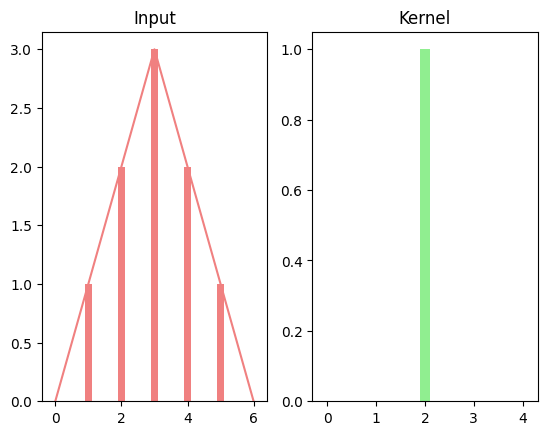

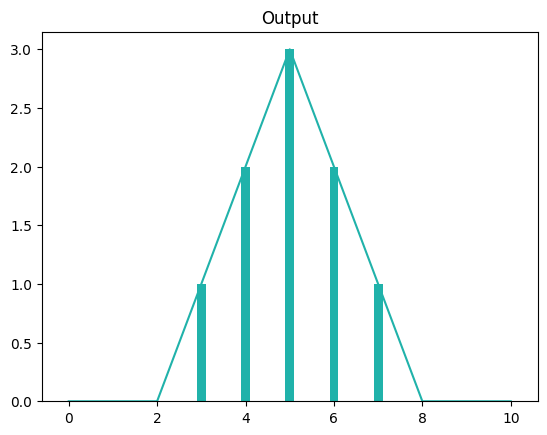

In [2]:
# 定义输入信号与卷积核
a = [0,1,2,3,2,1,0]

# 冲激函数
k = [0,0,1,0,0]

conv = conv_1d(a, k)
conv.plot()

当所用的卷积核是一个单位冲激信号（即“面积”等于1只在一个位置出现的窄脉冲）时，输入信号在卷积之后并没有发生变化。这是卷积的一个重要性质，请大家记住。

下面更换一下卷积核，看看输出会有什么不同的效果。

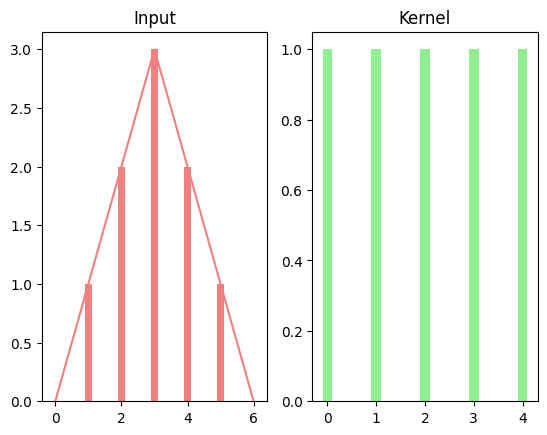

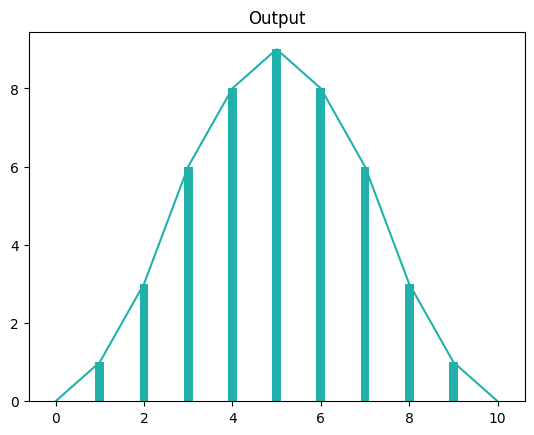

In [3]:
# 定义输入信号与卷积核
a = [0,1,2,3,2,1,0]
# 方波信号
k = [1,1,1,1,1]

conv = conv_1d(a, k)
conv.plot()

大家是否注意到，用一个方波信号对一个三角波信号进行卷积，其效果是将三角波变得平滑了。请大家记住这个现象，后续会再次提到。


接下来，我们开始编写二维卷积。我们将对一张图像进行处理，并直观的展示卷积前后图像的变化。和一维卷积类似，也使用冲激信号和方波信号作为卷积核。大家注意代码中二维冲激信号和二维方波信号的实现。这里直接调用Python中的库函数cv2.filter2D()进行二维卷积操作。我们把二维卷积的代码实现作为留给大家的习题，请大家自己完成。

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns

class conv_2d():
    def __init__(self, image, kernel):
        self.img = image
        self.k = kernel
        
    def plot(self):
        # 展示输入图像
        plt.imshow(self.img[:, :, ::-1])
        plt.axis('off')
        plt.title('Input')
        plt.show()
    
        # 展示卷积核
        fig = plt.figure(figsize=(2, 1.5))
        sns.heatmap(self.k)
        plt.axis('off')
        plt.title('Kernel')
        
    # 定义二维卷积
    def convolution(self, data, k):
        # 直接调用库函数进行卷积操作
        return cv2.filter2D(data, -1, k)

    
    # 展示二维卷积结果
    def plot_conv(self):
        # 卷积过程
        img_new = self.convolution(self.img, self.k)
        # 卷积结果可视化            
        plt.figure()
        plt.imshow(img_new[:, :, ::-1])
        plt.title('Output')
        plt.axis('off')
        return


为了后续章节方便使用，我们编写utils.py文件并将上述代码导入该文件中。

我们先来观察一下使用冲击信号对图像卷积的结果。

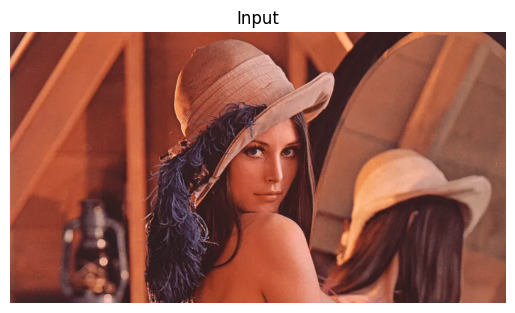

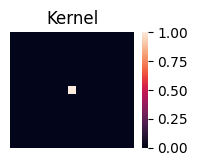

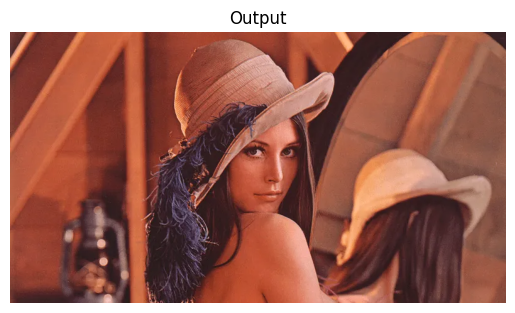

In [5]:
img =cv2.imread('lena.jpeg')

# 二维冲激卷积核
size = 15
k1 = np.zeros((size, size))
mid = (size-1) // 2
k1[mid][mid] = 1

# 展示输入图像与卷积核
conv = conv_2d(img, k1)
conv.plot()
\
# 展示卷积结果
conv.plot_conv()


由结果可见，用二维冲激函数对图像进行卷积，得到的结果和原图是一样的。这与进行一维卷积得到的结果一致。

接着，我们再来观察使用方波信号对图像卷积的结果。

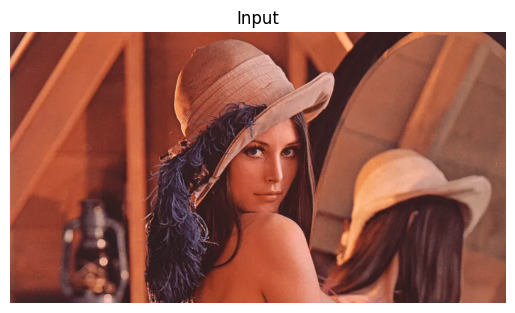

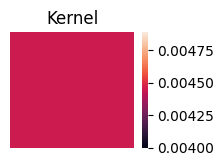

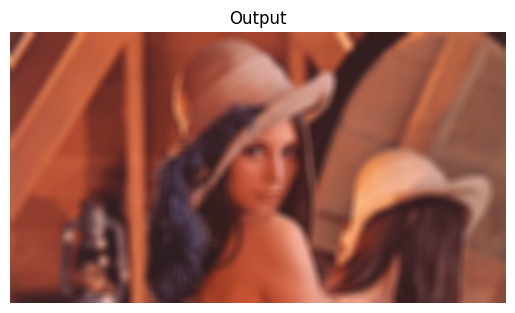

In [6]:
# 二维方波卷积核
size = 15
# 因为二维的核函数的大小是n*n的，因此在实现方波信号时我们需要除以(size*size)
k2 = 1/size/size * np.ones((size, size))

# 展示输入图像与卷积核
conv = conv_2d(img, k2)
conv.plot()

# 展示卷积结果
conv.plot_conv()

由结果可见，用方波信号作为卷积核，对图像做卷积，得到的结果是平滑模糊的图像，这也与我们在一维卷积中的实验结果一致。这是不是有一些图像处理的味道了？请大家记住这个结果，我们将在之后的章节中进一步阐述其原理。